# Monte Carlo Methods

With monte carlo methods, we don't assume complete knowledge of the environment. 
- Monte carlo methods only require experience, i.e., sample sequences of state, actions and rewards from actual or simulated experience with the environment. 

- Monte carlo methods solve RL problems based on averaging return samples. For this chapter, we want well-defined returns, so we're only going to define monte carlo methods for episodic tasks. This also means we assume the episode will always terminate eventually.

- Only on the completion of an episode do we change value episodes and the policy. So they're incremental in an episode-by-episode sense rather than changing on the fly (online) sense. 

- Monte Carlo as a term is used more broadly for any estimation method which operation involves a significant random component. 

- In this chapter we're looking at methods based on averaging complete terms, but the next chapter learns from only partial returns. 

- Monte carlo methods sample and average returns for each state-action pairs, much like the bandit methods from chapter 2, we also get the average rewards for each action. A big difference here is that we have multiple states with each acting like it's own bandit problem. This is like an associative-search or contextual bandit, and the individual bandit problems can be interrelated. They're interrelated in the sense that the return after taking an action in one state is dependeant on the actions taken in later states in the same episode. And because all state-actions are undergoing learning, the problem is nonstationary from the POV of an earlier state.

- To handle this nonstationarity, we adapt General Policy Iteration (GPIs) from Dynamic Programming. We calculated value functions from knowledge of the MDP before, but now we learn value functions use sample returns with the MDP. The general theory of competing and collobarative evaluation and improvement is still present. 

## Monte Carlo Prediction

- Averaging sample returns is the idea that underlies all Monte Carlo methods.

- An occurance of state s during an episode is known as a *visit* to state s. 

- We can visit the same state many times during an episode, but the first time it's visited is known as the *first visit* to s.

- The *first-visit* MC method estimates $v_{\pi}(s)$ as the average of the returns after the first visit of s. *Every-visit* methods average the returns following all visits to s. The two methods are similar but have slightly different theroetical properties.

### First-visit MC prediction for V:

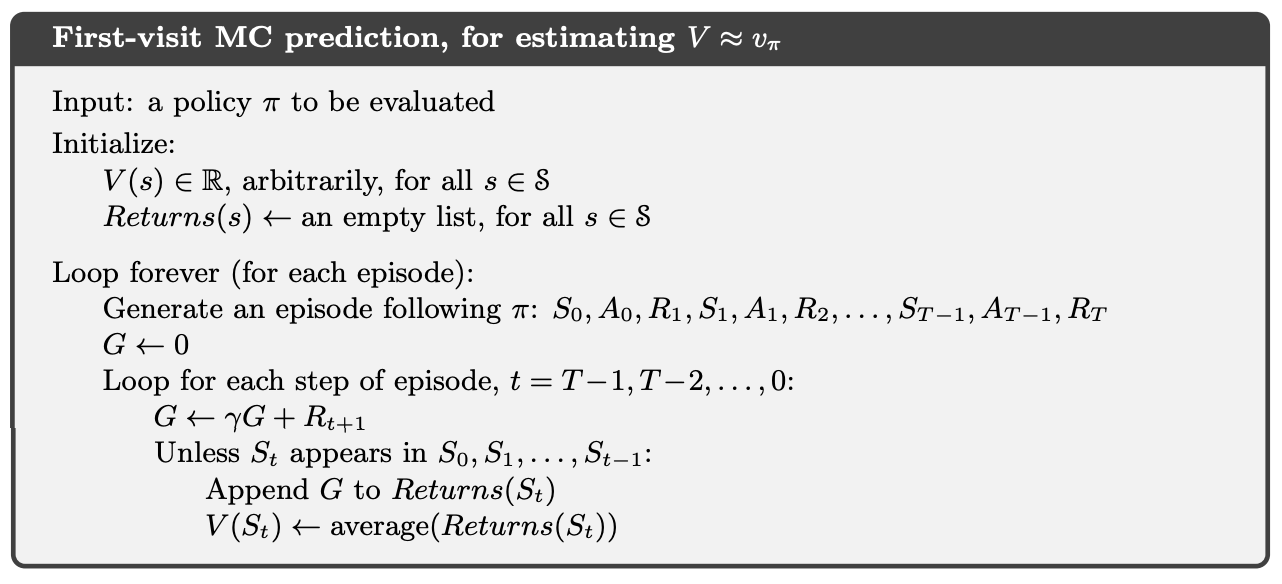

So we input the policy $\pi$, initialise the state values arbitrarily and the returns are an empty list.

Our first loop is for each episode. We get the sample sequence following $\pi$ and set our current return to 0.

Our second loop is for each timestep within the episode, where we start at t=T-1 and loop backwards to t=0. During this loop we set G, the current return, to itself discounted plus the reward from the corresponding timestep. this way we can get the accurat ereturn, including the discounting. Then if $S_t$ has not been reached yet, we append our return to the Returns list and set the state value to the average of the returns for that state, with it's old value and new return in mind. So we're essentially updating our new value for $S_t$.



Exercise 5.1

It jumps up at the last two, when the state for the player is 20 or 21. This is because for our policy, we only stick here when we're at 20 or 21 and if we're at 21 then we're obviously going to win and if we're at 20, then we have a very high chance of winning. It's likely not higher in the rest of the value state space because we're always going to hit, even if we're at 19, so we're quite likely to lose and thus the value is low. 

The last row on the left is state where the dealer is showing an ace. When the dealer has an ace, they have a better chance at winning as they can hit without risk. So this will lower the value functino for us. 

This is likely due to there being less updates as the case where we do have usable ace is much less likely. So the No usable ace case would be updated significantly more and thus be closer to their true value state.

Exercise 5.2

From the theory we know that both methods will converge eventually, so this question is asking us about the variability and speed of convergence. Every-visit MC may be more accurate here as we would better utilise trajectories where we have a usable ace as we'd have more returns to average.

- Using DP to get the value functions would be impractical for blackjack as we don't know the distribution for events, such as the four-argument p function. These functions aren't easy to get for blackjack. 
- The backup diagrams for MC methods differ significantly from DP methods. In DP, our backup diagrams shows the only the one-step transitions, while in MC methods, our backup diagrams go to the end of the episode. 
- In MC, state estimates are independant from other states, which is quite different from DP. MC methods don't bootstrap like DP.
- The computational cost of computing one states value estimate in MC is independant from the number of states. This can make MC attractive when we only need state values for a subset of the states. 

## Monte Carlo Estimation of Action Values

A model is what we use to predict how the envirnoment will respond to our actions, including our subsequent state and reward. If we don't have a model, then we can't rely purely on state values, because we don't know the likelihood of entering the subsequent states. This makes having the action values vital. Because we know know the action values, then we can just greedily pick the maximum action. This makes one of our primary goals in MC methods to be to estimate $q_*$. 

The policy evaluation problem for action values is largely the same as for state values, except our visits now refer to state-action pairs. The state action pair s,a is said to be have been visited if the action a was taken in state s during the episode. The same logic with first-visit and every-visit also follows. 

A complication of this method is that many state-action pairs may never be visited. If our policy is deterministic, then if we follow $\pi$, then we will only ever observe returns for one action from each state. So if we don't have returns for the other actions, the monte carlo estimates for those other actions won't improve with experience. This is a serious complication as the purpose of learning action vvalues is to decide among the actions in each state.  This is the general problem of *maintaining exploration*, like in the bandit problem from chapter 2. 

For our policy evluation to work for action values, we need to ensure that we maintain continual exploration. One method of doing this is by starting in a state-action pair, and that every state-action pair has a non-zero probability of being chosen. This means given infinite episodes, we will visit each state-action pair an infinite number of times. This assumption is known as *exploring starts*. 

This assumptions is sometimes useful, but can't be relied upon in general, especially when learning directly from actual interactions with the environment. A common alternative to this assumption is just assuring that all state-action pairs have a non-zero probability of being encountered.For now, we focus on the exploring starts assumption, but these will be discussed more later. 


Exercise 5.3

The diagram would likely look very similar to the MC state value backup diagram. It would look almost the exact same if the policy were deterministic. If it were stoachastic, then it would need to account for all possible state-action pairs for each state. 

## Monte Carlo Control

It's essentially the same concept as DP Control, where we have a policy evaluation algorithm and policy improvement algorthim. 

However we make two unlikely assumptions, one is that we have an infinite number of episodes and that we use exploring starts. We'll focus on the first for now. 

- Removing the infinite episodes assumption is relatively easy and something we explored in DP too. One method is to just set bounds, let setting a maximum difference in magnitude between two evaluations. This is good as it will guarentee correct convergence up to that bound, but it may require far too many episodes to be used in practice.

- The other form is to not complete policy evaluation before performing policy improvement, like in value iteration. So on each evaluation sweep, we move the value function toward $q_{\pi_k}$ So we don't expect q to get close to the optimal value, except after many iterations. The algorithm looks something like: 

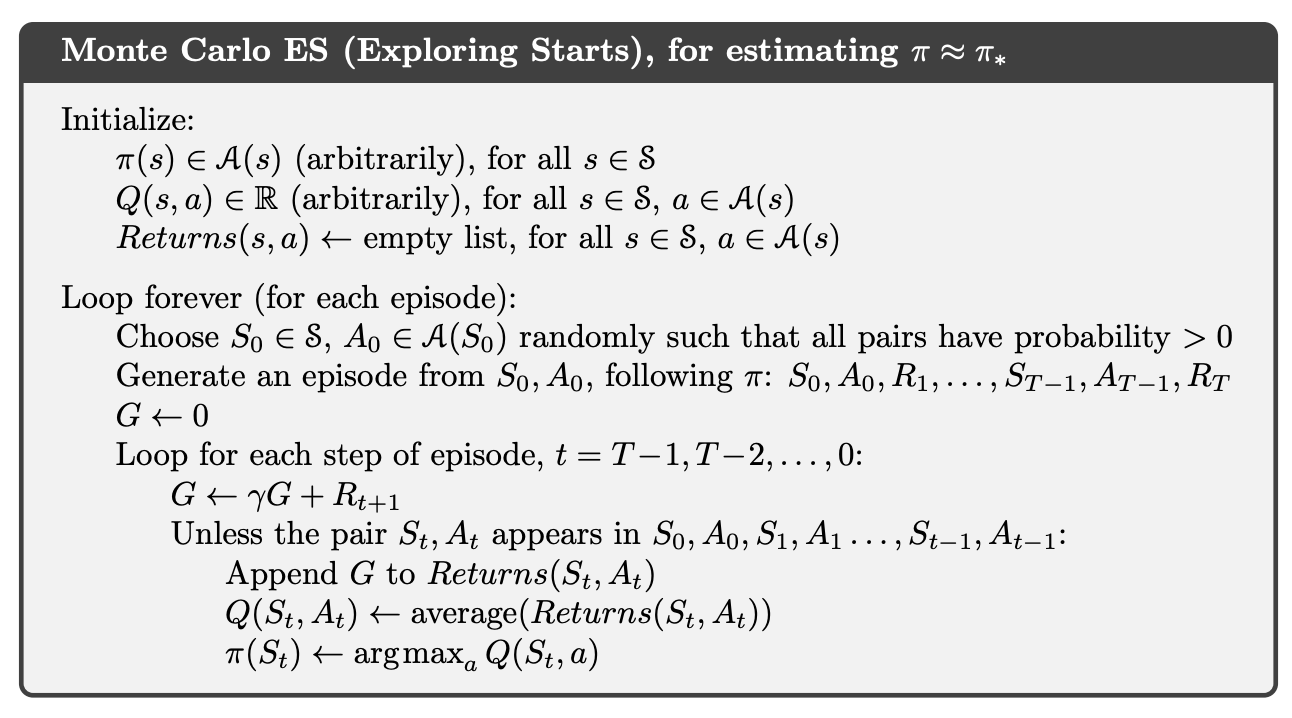



Exercise 5.4

You'd remove the returns lists entirely, as they won't be needed. You'd then change 
$$
Q(S_t,A_t) \leftarrow average(Returns(S_t,A_t))
$$
To
$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + (\frac{1}{C}*(Q(S_t,A_t)-G))
$$

## Monte Carlo Control without Exploring Starts

Now we need to with our other assumptions, that being that we use exploring starts. The only general way we can do this is by ensuring that all actions are continually chosen. We have two ways of doing this, known as on-policy and off-policy methods. On-policy methods attempt to evaluate and/or improve the policy that's used to make decisions, off-policy methods evaluate or improve a policy that's different from the policy that's being used to generate the data (i.e., the sample trajectories). 

The exploring starts method that was explored previously is a method of an on-policy method. We're now going to explore how on-policy methods can be used without the unrealistic assumptions of exploring starts. We'll look at off-policy methods later. 

In on-polcy methods, the policy is typically soft, meaning that $\pi(a|s)>0$ for all states and actions, then moves toward a determinstic optimal policy. Many of the mechanisms described in chapter 2 are applicable for this. One of these is the $\epsilon$-greedy policies, meaning that the majority of the time we pick the max action-value but with probability $\epsilon$, we pick a random action. So all nongreedy actions are given the minimal probability of actions, $\frac{\epsilon}{|\mathcal{A}(s)|}$ and the remaining bulk of the probability, $1 - \epsilon + \frac{\epsilon}{|\mathcal(A)(s)|}$ is given to the greedy action. 

$\epsilon$-greedy policies are examples of $\epsilon$-soft policies, which are defined as policies for which $\pi(a|s)\geq\frac{\epsilon}{|\mathcal{A}(s)|}$ for all states and actions for some epsilon greater than 0. Among $\epsilon$-soft policies, $\epsilon$-greedy policies are seen as the most 'greedy'. 

On-policy Monte Carlo control is still the same overall idea of GPI. Like the early-start variant, we use first-visit MC to estimate the action-value function for the current policy. But without the assumption of ES, we can't just improve the policy by making it greedy with respect to the current value function, because that would prevent further exploration of nongreedy actions. Thankfully, GPI doesn't require us to move all the way to the greedy policy, we just need to move *toward* it. The algorithm looks like the following:

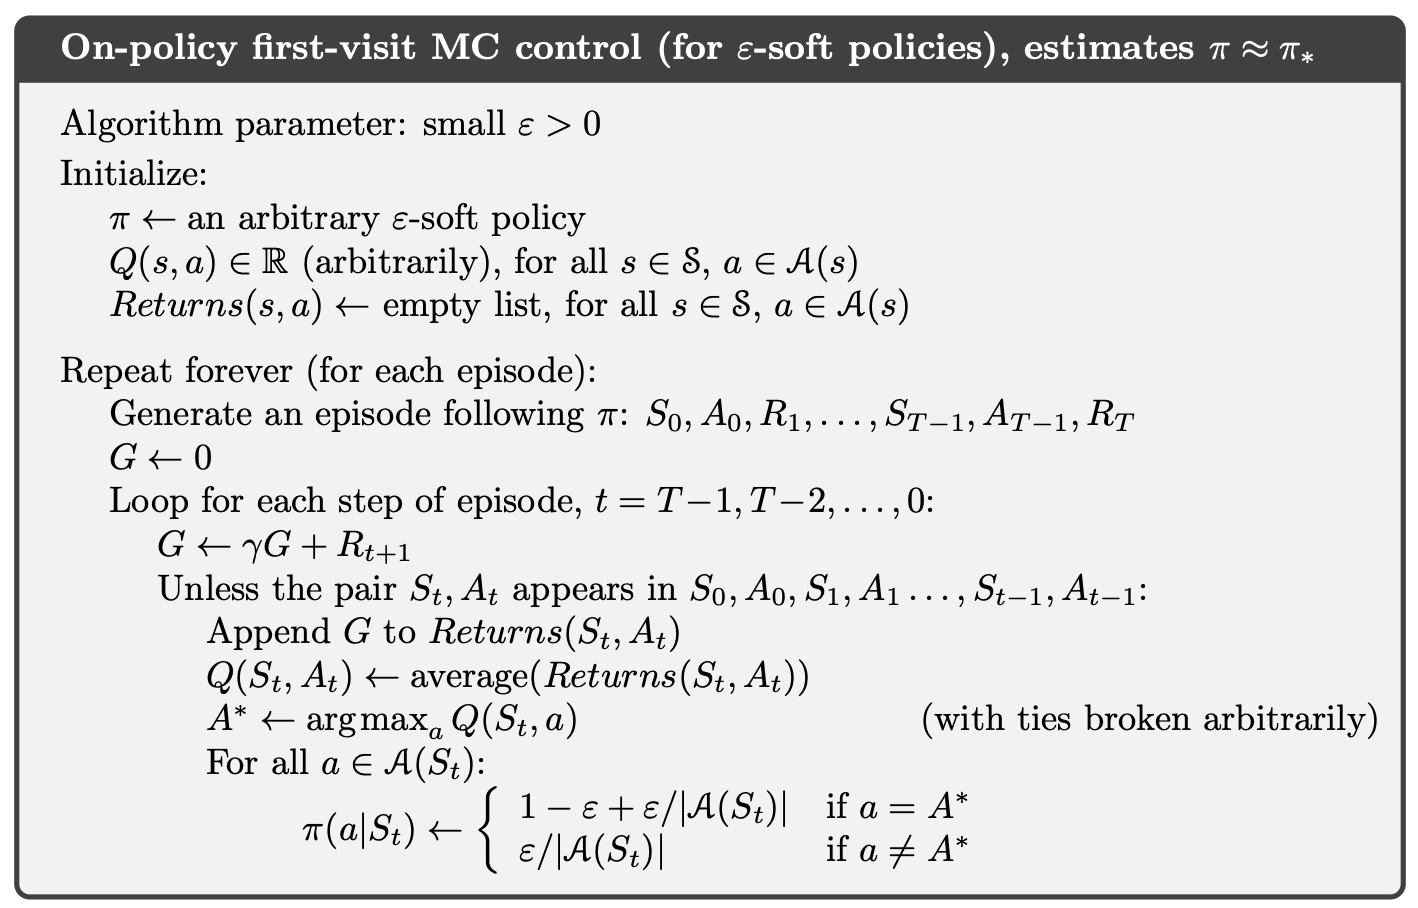

## Off-policy Prediction via Importance Sampling

A problem with control methods is that we want to find the optimal policy (behaviour), but we need to behave non-optimally to explore all actions. We implemented this non-optimality earlier using randomness, which is a fairly crude approach as our optimal policy is actually a compromise. The optimal policy there is a near-optimal policy that still explores. 

A more straightforward approach, one that is shown here, is to have two policies. One is the one we learn about, known as the *target policy*, and the policy used to generate the behaviour is known as the *behaviour policy*. Here we say that learning is from data "off" the target policy, and this whole process is known as *off-policy* learning. 

On-policy methods are typically simpler. Off-policy methods require more concepts and notations because the data is from another policy, and they are of greater variance and slower to converge. But they're also more powerful and general. Off-policy methods technically includes on-policy methods, but they're just a special case where target and behaviour policies are the same. 

To start with off-policy methods, if we want to use episodes using b to estimate values for $\pi$, then we require that every action taken under $\pi$ is at least occassionally taken under $b$. Formally, we need $\pi(a|s) > 0$ implies $b(a|s) > 0$. This assumption is known as *coverage*. This assumptions also implies that $b$ must be stochastic where it's not the same as $\pi$, otherwise $b$ would be 0 where $\pi$ is not, which would fail the assumptions. $\pi$ can be determinstic, and this case is especially important. In control, the target policy is usually the determinstic greedy policy with respect to the current estimate of the action-value functions. The target policy ten becomes a determinstic optimal policy whlie the behaviour remains stochastic and exploratory, like a$\epsilon$-greedy policy.

Almost all off-policy methods use *importance sampling*, a general technique for estimating expected values under one distribution given samples from another. Our use of importance sampling for off-policy learning is by weighing returns according to their relative probability of their trajectories occurring under the target and behaviour polciies, this known as the *importance-sampling ratio*. This ratio is fairly simple, starting at the starting state $S_t$, the probaility of the state-action trajectory occuring under a policy $\pi$ is:
$$
\Pr\{A_t,S_{t+1},A_{t+1},...,S_T|S_t,A_{t:T-1}~\pi\}
\\

= \pi(A_t|S_t)p(S_{t+1}|S_t,A_t)\pi(A_{t+1}|S_{t+1})...p(S_T|S_{T-1},A_{T-1})

\\
= \prod^{T-1}_{k=t}\pi(A_k|S_k)p(S_{k+1}|S_k,A_k)
$$



P is the state transition function as defined in chapter 2. This gives us the probability of the subsequent state-action trajectory. For the ratio, we need to combine our Target and Behaviour policies using our previously mentioned ratio (the importance-sampling ratio).

$$
\rho_{t:T-1}\doteq \frac{\prod^{T-1}_{k=t}\pi(A_k|S_k)p(S_{k+1}|S_k,A_k)}{\prod^{T-1}_{k=t}b(A_k|S_k)p(S_{k+1}|S_k,A_k)}=\prod^{T-1}_{k=t}\frac{\pi(A_k|S_k)}{b(A_k|S_k)}
$$

Our probability transitions cancel out, so they aren't necessary. This is great as these are typically unknown or difficult to calculate. So our importance sampling ratio depends only on our two policies, the MDP isn't important.

So how do we use the importance sampling ratio to get our state-values? We multiply it by expected return given by the behaviour policy. Like so:

$$
\mathbb{E}[\rho_{t:T-1}G_t|S_t=s]=v_{\pi}(s)
$$

Our importance sampling ratio essentially transforms our behaviour given state-value to be our target expected value. 

For convenience we'll use a new notation for timesteps such that they increase across episode boundaries. For example if the first episode in a batch ends at t=100, then the next episode begins at t=101. This allows us to refer to particular timesteps in particular episodes more easily. Formally, we define the set of all timesteps in which s is visited as $\mathcal{T}(s)$. Of course, it's only when EVERY timestep is visited when using every-visit methods, if it's first-visit, then $\mathcal{T}(s)$ refers to the set of first timesteps for the state s within their respective episode. We have another set known as $T(t)$ that is the set of terminating timesteps for each episode, so it's the timesteps that are the first terminating timetsep after t, and $G_t$ is the return after t up until $T(t)$. 

Then we have two sets, $\{G_t\}_{t\in\mathcal{T}(s)}$ are the returns that for state s, and $\{\rho_{t:T(t)-1}\}$ are their corresponding importance-sampling ratios. Then, to get $v_{\pi}(s)$, we just scale the returns by their ratios and average the results:

$$
V(s)\doteq \frac{\sum_{t\in\mathcal{T}(s)}\rho_{t:T(t)-1}G_t}{|\mathcal{T}(s)|}
$$

When the importance sampling is done with a simple average, like in the above formula, it's known as *ordinary importance sampling*. There is an alternative, which is important, known as *weighted importance sampling*, defined as:

$$
V(s)\doteq\frac{\sum_{t\in\mathcal{T}(s)}\rho_{t:T(t)-1}G_t}{\sum_{t\in\mathcal{T}(s)}\rho_{t:T(t)-1}}
$$


This is equal to 0 if the denominator is 0. The two varieties have their respective benefits and downsides. To illustrate the difference between the two, we can think of the first-visit methods using both importance sampling techniques. In the weighted average method, if we only observe one result, then the ratios in the numerator and denominator would cancel, so our state-value would be $G_t$, but this would be biased as it's the observed return for the target behaviour. On the other hand, if we use ordinary importance sampling, it would be the true once observed estimate for $v_{\pi}(s)$. But the ratio here may be huge, for example, 10. This indicates that the observed trajector is 10 times more likely to be seen using the target policy than the behaviour policy. So the importance sampled estimate is 10x the observed return, so it's quite far from the observed return even though the trajector is much more likely under the target than the behaviour policy. 

The key difference between the two methods is in terms of their biases and variances. Ordinary importance sampling is unbiased, where as weighted is biased (although the bias converges to 0 as the limit is reached). However the variance for ordinary is unbounded because the variance of the ratios can be unbounded. This is in contrast to the weighted method, where the largest weight on any single return is one. In fact, if we assume bounded returns, the variance of weighted importance sampling converges to zero even if the ratios themselves is infinite. In practice, the weighted estimator typically has much lower variance and is strongly preffered. But ordinary importance sampling isn't abandoned in the book as it's easier to extend to approximate methods using function approximation.

Every-visit methods for both methods of importance sampling are biased, but again, they fall to zero as samples increase. In practice, every-visit methods are commonly preferred because we no longer need to keepy track of which states have been visit and easier to extend to approximations. 

Exercise 5.5

First-visit

$G_0$ = 10

$\rho_{t:T(t)}=1$

$|\mathcal{T}|=1$

$V(s) = \frac{1*10}{1} = 10$

Every-visit

$G_0$ = 10

10 * 11 / 2= 55

$|\mathcal{T}|=10$

$V(s) = \frac{55}{10}=5.5$


[Text(0.5, 23.52222222222222, 'Dealer State'),
 Text(50.722222222222214, 0.5, 'Player')]

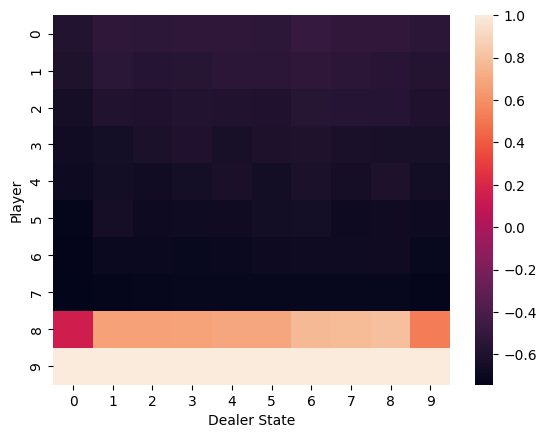

In [32]:
## BLACKJACK Monte Carlo Exploring Start Policy Prediction (Evaluation)
## Complete

import random
import numpy as np
import logging 
import seaborn as sns

#random.seed(1)
logging.basicConfig(level=logging.INFO)
logging.disable(logging.INFO)

def draw_card():
    # 1..9 with prob 1/13 each; 10 with prob 4/13
    """
    This function is necessary as each value doesn't have equal probability of being chosen
    It's more likely that we'll get a 10 than a 1 because there are 4x more cards that give 10 (10 card + Face Cards)
    """
    r = random.random()
    if r < 1/13: return 1
    if r < 2/13: return 2
    if r < 3/13: return 3
    if r < 4/13: return 4
    if r < 5/13: return 5
    if r < 6/13: return 6
    if r < 7/13: return 7
    if r < 8/13: return 8
    if r < 9/13: return 9
    return 10

def init_state():
    card_one = draw_card()
    card_two = draw_card()
    usable_ace = False

    # Player State
    if card_one == card_two == 1: # Both Aces
        player_state = 12
        usable_ace = True
    elif card_one == 1 and card_two != 1: # One usable ace
        player_state = 11 + card_two
        usable_ace = True
    elif card_one != 1 and card_two == 1:
        player_state =  card_one + 11
        usable_ace = True
    elif card_one + card_two > 11: # No usable aces, > 11
        player_state = card_one + card_two
    else: # No usable aces, less than 11, need to hit
        sum = card_one + card_two 
        while sum < 12:
            sum += draw_card()
        player_state = sum 
    
    # Dealer State
    dealer_state = draw_card()

    return player_state, dealer_state, usable_ace


state_values = np.zeros((2, 10, 10))
counts = np.zeros((2, 10, 11))
policy = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0]) # Stick if at 20 or 21

def generate_episode():
    # Get our initial states
    # We need to return the state trajectories, and one reward
    # We only need one reward as the rewards within the episode are just 0
    player_state, dealer_state, usable_ace = init_state()
    trajectory = [(player_state, dealer_state, usable_ace)]
    
    # First we can take into account if we're at 21
    if player_state == 21:
        return trajectory, 1 # Returning state and reward

    while True:
        if policy[player_state-12]: # Hit
            new_card = draw_card()
            new_sum = player_state + new_card

            if new_sum == 21: # Player wins
                trajectory.append([new_sum, dealer_state, usable_ace])
                return trajectory, 1
            if new_sum > 21: # Player busts We don't include the new state because it's not valid??? But why do include it when we win???
                """
                We have two choices, we could:
                    - Include all states in the trajectory, this would likely speed up convergence
                    - Only include the initial state, there seems to be no big upside here other than that it's easier to implement
                """ 
                return trajectory, -1
            
            player_state += new_card 
            trajectory.append([player_state, dealer_state, usable_ace])


        else: # Stick
            break
    
    # We've stuck, now it's the dealers turn 
    while True:
        new_card = draw_card()

        if dealer_state == 1 and new_card == 10: # Dealer has a usable ace and wins
            return trajectory, -1
        if dealer_state == 1: # Uses usable ace, continues
            dealer_state = 10 + new_card 
        elif dealer_state + new_card > 21: # Dealer busts
            return trajectory, 1
        elif dealer_state + new_card == 21: # Dealer wins
            return trajectory, -1
        elif dealer_state + new_card >= 17: # Dealer sticks, check who's closer
            dealer_state += new_card
            break
        else:
            dealer_state += new_card
            continue # Dealer hits

            # Other cases
            """
            1. Dealer state >= 17, dealer sticks
            2. Dealer state < 17, dealer hits
            3. Dealer state == 21, dealer wins
            """

    # Both have stuck, now compare who's closer to 21
    dealer_diff = 21 - dealer_state 
    player_diff = 21 - player_state 

    if dealer_diff == player_diff:
        return trajectory, 0
    elif dealer_diff < player_diff:
        return trajectory, -1
    else:
        return trajectory, 1

            
def monte_carlo_evaluation():
    for j in range(500_000):
        episode = generate_episode()
        reward = episode[1]

        for state in episode[0]:
            x = int(state[2])
            y = state[0]-12
            z = state[1]-1
            counts[x,y,z] += 1
            state_values[x, y, z] += (reward-state_values[x,y,z])/counts[x,y,z]

    return state_values

np.set_printoptions(suppress=True)
monte_carlo_evaluation()

ax = sns.heatmap(state_values[0])
ax.set(xlabel="Dealer State", ylabel="Player")


[[[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
  [0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
  [0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
  [0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
  [0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]]


[Text(0.5, 23.52222222222222, 'Dealer State'),
 Text(50.722222222222214, 0.5, 'Player')]

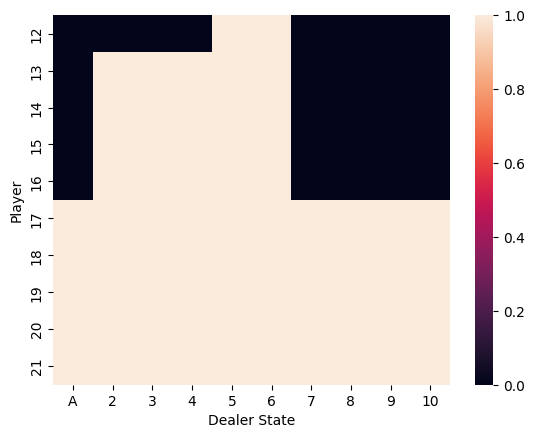

In [39]:
## Blackjack Monte Carlo Exploring Starts Control

""" 
I"ve misunderstood what a usable ace actually is.
It means that if we have a usable ace, we can count it as 1 or 11.
So if we get an ace, then a 3, then a 10, that's not a bust as we've got the usable ace. 
There can only be one usable ace, because if there were theroetically two, that would equal 22.
"""

import random
import numpy as np
import logging 
import seaborn as sns

#random.seed(1)
logging.basicConfig(level=logging.INFO)
logging.disable(logging.INFO)

def draw_card():
    # 1..9 with prob 1/13 each; 10 with prob 4/13
    """
    This function is necessary as each value doesn't have equal probability of being chosen
    It's more likely that we'll get a 10 than a 1 because there are 4x more cards that give 10 (10 card + Face Cards)
    """
    r = random.random()
    if r < 1/13: return 1
    if r < 2/13: return 2
    if r < 3/13: return 3
    if r < 4/13: return 4
    if r < 5/13: return 5
    if r < 6/13: return 6
    if r < 7/13: return 7
    if r < 8/13: return 8
    if r < 9/13: return 9
    return 10

def init_state():
    card_one = draw_card()
    card_two = draw_card()
    usable_aces = 0

    # Player State
    if card_one == card_two == 1: # Both Aces
        player_total = 12
        usable_aces = 1
    elif card_one == 1 and card_two != 1: # One usable ace
        player_total = 11 + card_two
        usable_aces = 1
    elif card_one != 1 and card_two == 1:
        player_total =  card_one + 11
        usable_aces = 1
    elif card_one + card_two > 11: # No usable aces, > 11
        player_total = card_one + card_two
    else: # No aces, less than 11, need to hit
        player_total = card_one + card_two 
        while player_total < 12:
            new_card = draw_card()
            if new_card == 1:
                usable_aces += 1
                player_total += 11
            else:
                player_total += new_card
            if player_total > 21:
                usable_aces -= 1
                player_total -= 10
    
    # Dealer State
    dealer_state = draw_card()

    return player_total, dealer_state, usable_aces

def random_init_state():
    player_state = random.randint(12, 21)
    usable_aces = random.randint(0, 1)
    dealer_state = random.randint(1, 10)

    return player_state, dealer_state, usable_aces



action_values = np.zeros((2, 2, 10, 10)) # 2 Actions, True/False Usable ace, 10 player states, 10 dealer states
counts = np.zeros((2, 2, 10, 10))
policy = np.zeros((2, 10, 10)) # New policy format needs to accounts for all states, begins at always stick

def dealers_turn(dealer_state):
    # We've stuck, now it's the dealers turn 
    usable_aces = 0
    if dealer_state == 1:
        usable_aces += 1
        dealer_total = 11
    else:
        dealer_total = dealer_state
        
    while dealer_total < 17:
        new_card = draw_card()
        if new_card == 1:
            dealer_total += 11
            usable_aces += 1
        else:
            dealer_total += new_card 
        
        while (dealer_total > 21 and usable_aces > 0):
            dealer_total -= 10
            usable_aces -= 1

    return dealer_total


def generate_episode(policy):
    player_total, dealer_state, usable_aces = random_init_state()
    states, actions = [(player_total, dealer_state, usable_aces)], []

    # Generate first action randomly, for exploring starts
    if random.random() < 0.5:
        stick = True
    else:
        stick = False

    if stick: # If stick, then it's the dealers turn
        actions.append(True)
    else: # Hit, then follow policy
        actions.append(False)
        new_card = draw_card()
        if new_card == 1:
            usable_aces += 1
            player_total += 11 
        else:
            player_total += new_card 

        if player_total > 21 and usable_aces > 0:
            player_total -= 10
            usable_aces -= 1
    
    # Done with the exploring starts component, now we follow the policy
    if not stick:
        while player_total <= 21:
            states.append((player_total, dealer_state, usable_aces))
            if not policy[int(usable_aces > 0), player_total-12, dealer_state-1]:
                actions.append(False)

                new_card = draw_card()
                if new_card == 1:
                    player_total += 11
                    usable_aces += 1
                else:
                    player_total += new_card 
                
                if player_total > 21 and usable_aces > 0:
                    player_total -= 10
                    usable_aces -= 1

            else:
                actions.append(True)
                break

    dealer_total = dealers_turn(dealer_state)
    
    # Now to check who wins
    if player_total == dealer_total == 21: # Case 1.
        reward = 0
    elif player_total == 21 and dealer_total != 21: # Case 2.
        reward = 1
    elif player_total > 21: # Case 3.
        reward = -1 
    elif dealer_total > 21 and player_total < 21: # Case 4.
        reward = 1
    elif player_total != 21 and dealer_total == 21: # Case 5.
        reward = -1
    elif player_total == dealer_total and player_total < 21: # Case 6.
        reward = 0
    elif player_total - dealer_total > 0: # Case 7.
        reward = 1
    else: # Case 8.
        reward = -1

    # All possible finishing conditions:
    # 1. Player and dealer at 21 = Draw - Tick
    # 2. Player is at 21, dealer isn't = Player wins - Tick
    # 3. Player busts = Player loses - Tick
    # 4. Player sticks and dealers busts = Player wins - Tick
    # 5. Player is not at 21 and dealer is = Dealer wins
    # 6. Player and dealer both stick at the same value = Draw - Tick
    # 7. Player and dealer both stick and player is closer = Player wins
    # 8. Player and dealer both stick and dealer is closer = Dealer wins

    return states, actions, reward

      
def monte_carlo_control(policy):
    for _ in range(10_000_000):
        states, actions, reward = generate_episode(policy)

        for state, action in zip(states, actions):
            a = int(action)
            x = int(state[2] > 0)
            y = state[0]-12
            z = state[1]-1
            counts[a, x, y, z] += 1
            action_values[a, x, y, z] += (reward-action_values[a, x, y, z])/counts[a, x, y, z]
            # Update policy
            policy[x, y, z] = 1 if action_values[1, x, y, z] > action_values[0, x, y, z] else 0


    return action_values

np.set_printoptions(suppress=True)

monte_carlo_control(policy)

print(policy)


player_labels = ["12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]
dealer_labels = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

ax = sns.heatmap(policy[0], xticklabels=dealer_labels, yticklabels=player_labels)
ax.set(xlabel="Dealer State", ylabel="Player")


[Text(0.5, 23.52222222222222, 'Dealer State'),
 Text(50.722222222222214, 0.5, 'Player')]

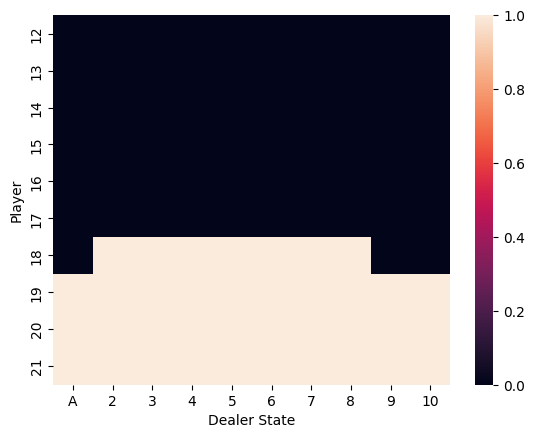

In [40]:

ax = sns.heatmap(policy[1], xticklabels=dealer_labels, yticklabels=player_labels)
ax.set(xlabel="Dealer State", ylabel="Player")


Exercise 5.6

The equation should be the same, except the timesteps would refer to the state-action pairs rather than just the state. Rho ($\rho$) would also be the same, just referring to state action pairs. This can be shown by using $\mathcal{T}(s,a)$ instead of just s.

$$
Q(s,a)\doteq\frac{\sum_{t\in\mathcal(T)(s,a)}\rho_{t:T(t)-1}G_t}{\sum_{t\in\mathcal{T}(s,a)}\rho_{t:T(t)-1}}
$$


Exercise 5.7

This likely happened because in the ordinary importance sampling method, the trajectories were more likely in the target policy than the behaviour policy. This made their corresponding expected value an overestimation. So over time trajectories that were more like the behaviour policy were sampled, which gave a lower value for $\rho$, which would have lowered the expected state value. 

In the weighted example, in the beginning the expected value would be for the behaviour policy as their rhos would have cancelled out. So I'm guessing over time this bias was reduced, bringing it closer to it's own expected value, which increased the error, but with more samples, it reduced again to reach the target policies expected value. 

---
So the initial p's don't completely cancel out numerator p's, ebcause they're linked to their corresponding returns. But they are still biased towards the behaviour policy in the beginning. As more values are sampled, it start to diverge from the target policy, likely due to extreme values. As we get even more samples, this bias reduces and it reaches the target policies values.


Exercise 5.8

Yes, it would likely still be infinite. There would just be more samples taken, so the variance might be reduced, but still infinite. 

## Incremental Implementation

Like previous methods, we want ways to efficiently increment our value functions. For ordinary importance sampling, it's essentially the same as taking the average, but like in earlier chapters, we have a more efficient way of doing this other than recomputing it each time:

$$
V_{n+1} \doteq V_n + \frac{1}{C_n}[G_n-V_n]
$$

But for weighted importance sampling, this becomes a bit more tricky as we aren't calculating a simple average. Instead, we store the running importance sampling ratios, and use that to weigh our new changes:

$$
V_{n+1} \doteq V_n + \frac{W_n}{C_n}[G_n-V_n], n \geq 1,

\\
\text{and}
\\
C_{n+1} \doteq C_n + W_{n+1}, \ C_0 \doteq 0
$$


Exercise 5.9

I've already done that

Exercise 5.10

Unweighted Derivation
$$
Q_{n+1}=\frac{1}{n}\sum_n^{i=1}R_i

\\

= \frac{1}{n}(R_n+\sum^{n-1}_{i=1}R_i)

\\

= \frac{1}{n}(R_n+(n-1)\frac{1}{n-1}\sum^{n-1}_{i=1}R_i)

\\

= \frac{1}{n}(R_n+(n-1)Q_n)

\\

= \frac{1}{n}(R_n+nQ_n-Q_n)

\\

= Q_n+\frac{1}{n}[R_n-Q_n]
$$


Weighted Derivation

$$
V_n \doteq \frac{\sum^{n-1}_{k=1}W_kG_k}{\sum^{n-1}_{k=1}W_k}
$$

IDK how to do this rn, come back later


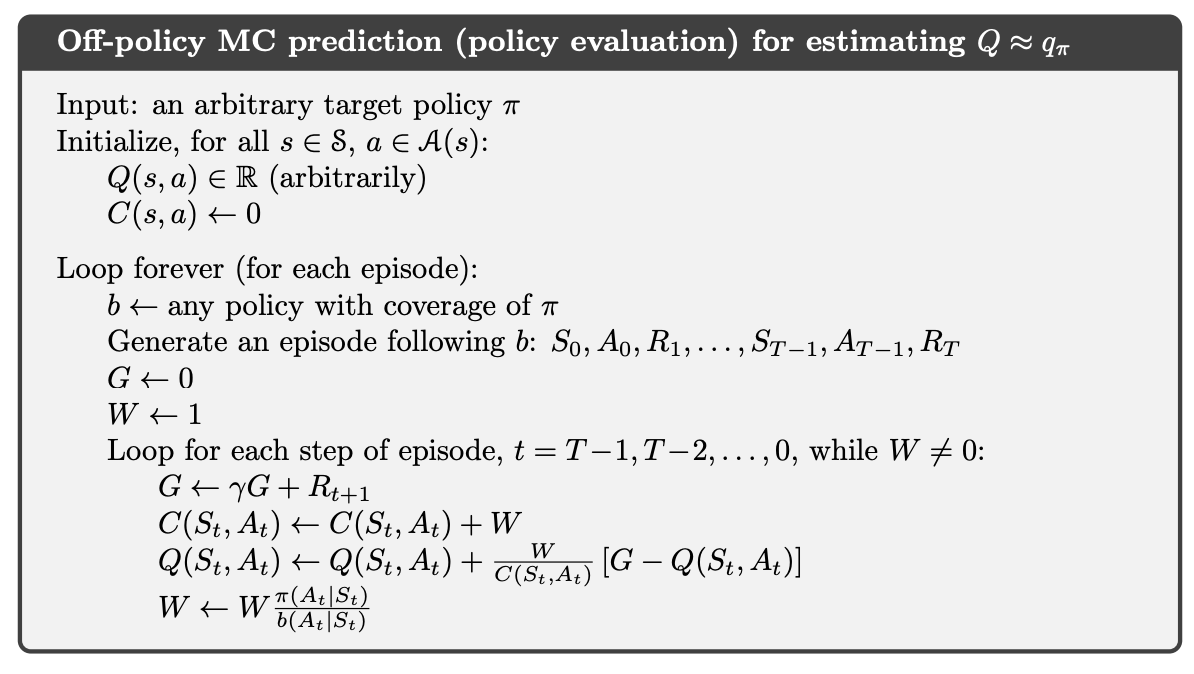

## Off-policy Monte Carlo Control

Now we go onto off-policy monte carlo control methods. The more important thing about these methods is that they are "off-policy". This means that we are learning a target policy from another policy, the behaviour policy. A key advantage to this is that our target policy can be deterministic while our behaviour policy is typically soft, so all actions in all states have a non-zero chance of being chosen. Strictly, the behaviour policy must have a non-zero possibility of choosing an action where it's also above zero for the target policy, this is known as coverage.

The next algorithm is the off-polcy monte carlo control methods. It uses GPI and weighted importance sampling for estimating $\pi_*$ and $q_*$. Our behaviour policy can be anything as long as it satisfies coverage. In order for convergence of $\pi$ to the optimal policy, an infite number of returns needs to be obtained for each state-action pair. We can assure this be picking $b$ as $\epsilon$-soft. 


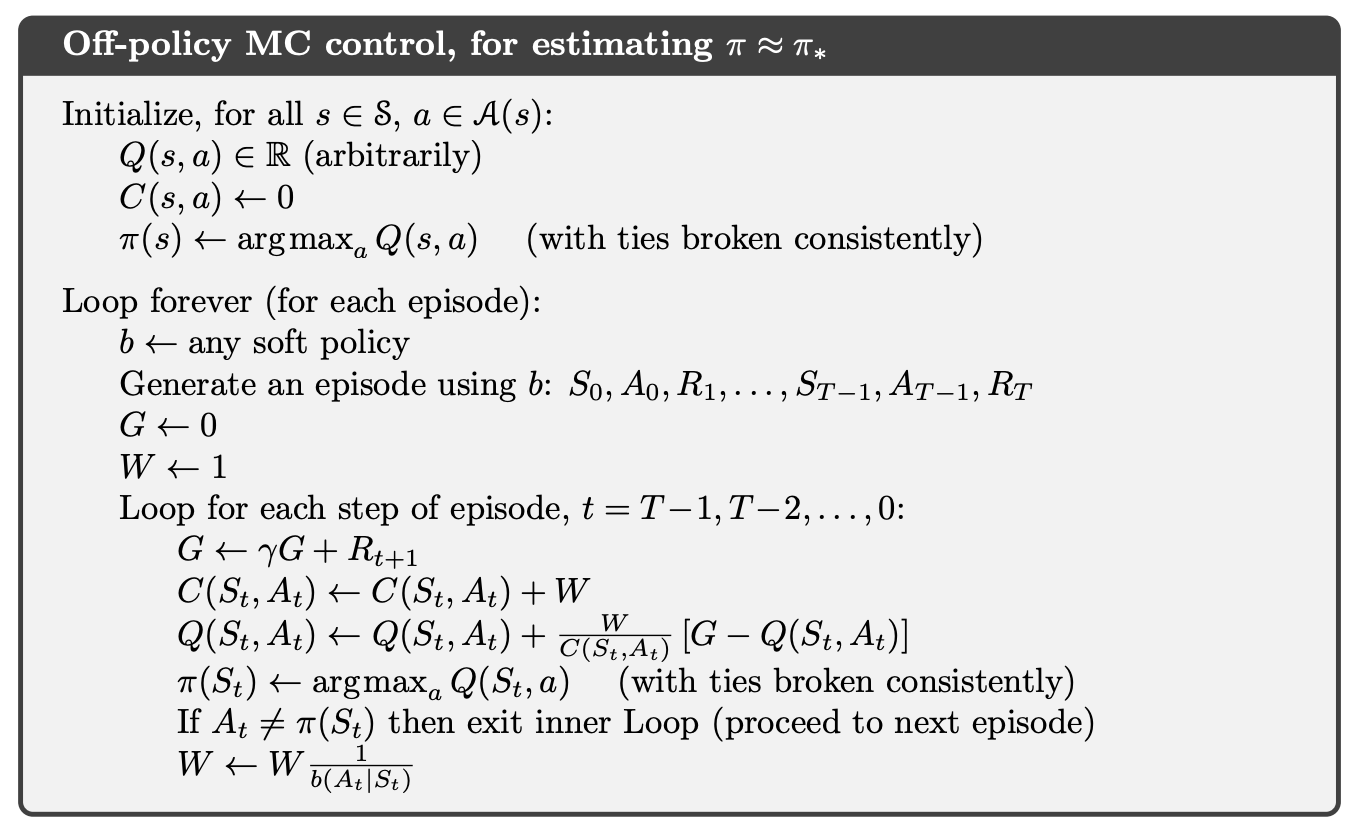

So we start by initialising our variables. 

Q being our action values, these are initialised arbitrarily as some real number. 

C is one compontent of our weighting factor, and it's our running total of importance sampling trajectories for a given state-action pair. 

$\pi$ is of course our policy, which is chosen by greedily picking the max action value for each state. But our ties ned to be chosen consistenly, whether it's first or random, etc. 

For the algorithm itself, we loop for each episode. Since this is thereotical, we can say it loops forever.

- Inside this loop, we begin by initialising our behaviour policy, this can be anything as long as it satisfies coverage. Ideally it's some $\epsilon$-soft policy, but it's not importance for this.

- We then generate our trajectory under the policy b. This is a series of state, actions and rewards.

- G is our return, and if we reach t=0, then it would be our complete return for t=0. But if it's t=T-1, then it's still our return for t=T-1. 

- W is the other part of our weighting ratio, we set it at 1 to begin, because if we set it to 0, then it would make any result 0. W is going to be our importance sampling ratio for this specific episode.

We then loop within each timestep of our episode, starting at t=T-1 and going backwards to t=0. 

- First we get our discounted return. By doing it backwards we automatically implement our discounting as each subsequent multiplication of $\gamma$ will act like another 1 to it's power. 

- Now we update C for the state-action pair at time t by adding our current importance sampling ratio to it. W starts at 1, but it will likely get smaller, unless the behaviour and target policy are the same.

- Then it's our action value update this is done incrementally using our weighting value (W/C). So it's our current importance sampling ratio for the trajectory divided by the running importance sampling total for the corresponding state-action pair. This is then multiplied by our error term G-Old action value.

- Now for control, we set our target policies action greedily to the max action for the given state. 

- If our action at time t was not the same as the target policy at time t in state s, then we exit this episode and enter the next episode. Why do we do this??

- If it is, then update our current importance sampling ratio. This is $W \leftarrow W \frac{1}{b(A_t|S_t)}$ since we know $\pi(A_t|S_t)$ is going to be 1 since if it weren't, we'd have stopped calculating for this episode. 


For the part we stop if A_t is not equal to $\pi(S_t)$, we do this because our importance sampling ratio would drop to 0, making any further actions useless as our weighting ratio would become 0. 

A potential problem for this algorithm is that it learn mostly from the tails of th episodes, when the remaining actions within the episode are greedy. If non-greedy actions are common, then learning will be quite slow, particularly for states in early timesteps of long episodes. These problems can be addressed by using temporal-difference learning, or if $\gamma$ is less than 1, then other methods may be used.




Exercise 5.11

$\pi(A_t|S_t)$ will always be 1 here because we would stop before that point if it weren't by the $A_t \neq \pi(S_t)$

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Discounting Aware Importance Sampling

Regular importance sampling, including the types we've just been through, don't account for the internal structures of returns as sums of discounted rewards. This can lead to inefficiencies if our hyperparameters aren't what we expect.

For example, when episodes are long and $\gamma$ is significantly less than 1.  A concrete example here would be an episode of 100 steps and $\gamma = 0$. So the return for t=0 would be $G_0=R_1$, but it's corresponding importance sampling ratio would be the product of 100 factors, from t=0 to t=99. In ordinary importance sampling, the return would be scaled by this entire product, when the only necessary ratio is that at t=0. The other factors aren't important as the return has already been determined after the first reward. So using the other factors adds enormously to the variance, and in some cases makes it infinite.

Now we consider an idea for avoiding this large unnecessary variance. The idea, in essence, is to think of discounting as determining a probability of termination, or equally, a degree of partial determination. 

So for any $\gamma\in[0,1)$, we think of the return $G_0$ as partly terminating in one step, to the degree $1-\gamma$, which just produces a return of the first reward $R_1$, and as partly terminating after two  steps to the degree $(1-\gamma)\gamma$, producing a return of $R_1 + R_2$. 

This continues on, with the third steps degree of termination being $(1-\gamma)\gamma^2$. This reflects all the previous degrees, as the $\gamma$ reflecting that the termination did not occur on either of the first two steps. These partial returns are called *flat partial returns*:

$\bar{G}_{t:h}\doteq R_{t+1}+R_{t+2}+...+R_h, 0 \leq t < h \leq T$

Here, "flat" means there's an absence of discounting, and "partial" denotes that these returns don't extend all the way to termination, but instead to timestep h, known as the *horizon*.

Our conventional full return $G_t$ can be viewed as a sum of flat partial returns as suggested above like so:

$$
G_t \doteq R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ...  \gamma^{T-t-1}R_T
\\
=(1-\gamma)R_{t+1}
\\
+(1-\gamma)\gamma(R_{t+1}+R_{t+2})
\\
+(1-\gamma)\gamma^2(R_{t+1}+R_{t+2}+R_{t+3})
\\
...
\\
+(1-\gamma)\gamma^{T-t-2}(R_{t+1}+R_{t+2}+...+R_{T-1})
\\
+\gamma^{T-t-1}(R_{t+1}+R_{t+2}+...+R_T)
\\
+
=(1-\gamma)\sum^{T-1}_{h=t+1}\gamma^{h-t-1}\bar{G}_{t:h}+\gamma^{T-t-1}\bar{G}_t:T

### Per Decision Importance Sampling

We have another way to structure the return for off-policy importance sampling that may reduce variance even if discounting is 1. To get there, we must first look at our original off-policy estimators. We can see that each term of the sum in the numerator is itself a sum.

$$
\rho_{t:T-1}G_t=\rho_{t:T-1}(R_{t+1}+\gamma R_{t+2}+...+\gamma^{T-t-1}R_T)

\\

=\rho_{t:T-1}R_{t+1}+\gamma \rho_{t:T-1}R_{t+2}+...+\gamma^{T-t-1}\rho_{t:T-1}R_t
$$

We can we write the first subterm to be:

$$
\rho_{t:T-1}R_{t+1}=\frac{\pi(A_t|S_t)}{b(A_t|S_t)}\frac{\pi(A_{t+1}|S_{t+1})}{b(A_{t+1}|S_{t+1})}...\frac{\pi(A_{T-1}|S_{T-1})}{b(A_{T-1}|S_{T-1})}R_{t+1}
$$

Of all the factors within this equation, we might assume that only two are important for what we're trying to calculate, that being the first term (importance sampling weight for our action at t) and the reward for that action ($R_{t+1}$).

Then for the subsequent ratios after t, each of their expected values is 1:
$$
\mathbb{E}[\frac{\pi(A_k|S_k)}{b(A_k|S_k)}]\doteq \sum_ab(a|S_k)\frac{\pi(a|S_k)}{b(a|S_k)}=\sum_a\pi(a|S_k)=1
$$

The first term's expectation is not necessarily equal to 1 as it relies on our current state and action, but our future values, k > t, depend on future states and actions, so we get their expectations. Our first equality is true based on the definition of expectations, then our second equality is true because the multiplication of b with the fraction with the denominator with b cancel out, giving the next equality which of course is equal to 1.

With some more steps, which we'll leave out, all of these other factors really have no effect on our expectation, so:

$$
\mathbb{E}[\rho_{t:T-1}R_{t+1}]=\mathbb{E}[\rho_{t:t}R_{t+1}]
$$

Then we can repeat this process for each kth subterm, with k > t:
$$
\mathbb{E}[\rho_{t:T-1}R_[t+k]]=\mathbb{E}[\rho_{t:t+k-1}R_{t+k}]
$$

We can generalise this for our entire return:

$$
\mathbb{E}[\rho_{t:T-1}G_t]=\mathbb{E}[\tilde{G}_t]
$$

where:

$$
\tilde{G}_t=\rho_{t:t}R_{t+1}+\gamma\rho_{t:t+1}R_{t+2}+\gamma^2\rho_{t:t+2}R_{t+3}+...+\gamma^{T-t-1}\rho_{t:T-1}R_T
$$

This is the central idea to per-decision importance sampling. It's essentially we only use the relevant importance sampling ratios for each reward. This gives us an alternate importance-sampling estimator, with the ordinary version being:

$$
V(s)\doteq\frac{\sum_{t\in\mathcal{T}(s)}\tilde{G}_t}{|\mathcal{T}(s)|}
$$

This would hopefully have better, lower, variance characteristics. It's unknown what the weighted importance sampling version of this would be, or if there even is one. All the proposed estimators have not been found to be consistent, so they don't converge to the true value with infinite data.
